<a href="https://colab.research.google.com/github/Nagano11/Sales_analysis_sample/blob/main/Sales_Dataset_Analysis_(May'2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#X Company Sales data analysis

This dataset is a simulation of a company that sells electronics (cellphone, notebook and tablet). The data contains data of one year (2021) from January to December.

## Importing libraries

In [113]:
!pip install abc_analysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import openpyxl
from google.colab import drive
from abc_analysis import abc_analysis, abc_plot

## Loading the database

In [115]:
drive.mount("/content/drive/")
#dados = pd.read_excel('Base Comercial.xlsx')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [116]:
data = pd.read_excel('/content/drive/MyDrive/Estudo Programação/Portfólio Dados/Jenny Base de Dados para Portfólio/Base de Dados/Base Comercial.xlsx', engine='openpyxl')

In [117]:
data.head()

,Data,Vendedor,UF,Produto,Valor Unitario,Quantidade Vendida,Faturamento,Lucro,Forma de Pagamento
0,2021-01-01,Marco Maia,AM,Celular,300,5,1500,500,Cartão de Crédito
1,2021-01-01,Marco Maia,SC,Tablet,500,2,1000,500,Boleto
2,2021-01-01,Marco Maia,PE,Notebook,700,6,4200,2600,Cartão de Crédito
3,2021-01-01,Paula Amorim,MT,Celular,300,1,300,100,Boleto
4,2021-01-01,Paula Amorim,TO,Tablet,500,1,500,300,Boleto


## Treatment of the Dataframe

### Analyzing the quality and general contents of loaded dataframe

In [118]:
data.dtypes

Data                  datetime64[ns]
Vendedor                      object
UF                            object
Produto                       object
Valor Unitario                 int64
Quantidade Vendida             int64
Faturamento                    int64
Lucro                          int64
Forma de Pagamento            object
dtype: object

In [119]:
data.shape

(13060, 9)

In [120]:
data.count()

Data                  13060
Vendedor              13060
UF                    13060
Produto               13060
Valor Unitario        13060
Quantidade Vendida    13060
Faturamento           13060
Lucro                 13060
Forma de Pagamento    13060
dtype: int64

In [121]:
print(data.Data.min())
print(data.Data.max())

2021-01-01 00:00:00
2021-12-31 00:00:00


In [122]:
data.describe()

,Valor Unitario,Quantidade Vendida,Faturamento,Lucro
count,13060.000000,13060.000000,13060.000000,13060.000000
mean,499.938744,3.087060,1541.952527,658.200613
std,163.299305,2.226029,1269.919295,600.134740
min,300.000000,0.000000,0.000000,0.000000
25%,300.000000,1.000000,600.000000,200.000000
50%,500.000000,3.000000,1200.000000,500.000000
75%,700.000000,4.000000,2100.000000,900.000000
max,700.000000,9.000000,6300.000000,4100.000000


###Translating columns and data from Portuguese to English

In [123]:
data.columns

Index(['Data', 'Vendedor', 'UF', 'Produto', 'Valor Unitario',
       'Quantidade Vendida', 'Faturamento', 'Lucro', 'Forma de Pagamento'],
      dtype='object')

In [124]:
translation_column = {'Data':'Date', 'Vendedor':'Seller', 'UF':'State', 'Produto':'Product', 'Valor Unitario':'Unit_Value',
               'Quantidade Vendida':'Qty_sold', 'Faturamento':'Sales_amount', 'Lucro':'Profit', 'Forma de Pagamento':'Payment_term'}

data.rename(columns=translation_column, inplace=True)

In [125]:
print(data['Product'].unique())
print(data['Payment_term'].unique())
print(data['Seller'].unique())
print(data['State'].unique())

['Celular' 'Tablet' 'Notebook']
['Cartão de Crédito' 'Boleto']
['Marco Maia' 'Paula Amorim' 'Vanessa Souza' 'Bruna Castro']
['AM' 'SC' 'PE' 'MT' 'TO' 'BA' 'MA' 'MG' 'AP' 'RR' 'CE' 'PA' 'DF' 'RJ'
 'MS' 'GO' 'SE' 'AL' 'PB' 'SP' 'PI' 'RS' 'RO' 'ES' 'PR' 'AC' 'RN']


In [126]:
translation_values = {'Celular':'Cellphone', 'Cartão de Crédito':'Credit card', 'Boleto':'Payment slip'}

data.replace(translation_values, inplace=True)

### Including state name for Power BI to recnognize in Map visualization

In [127]:
states = {'AM':'Amazonas, AM', 'SC':'Santa Catarina, SC', 'PE':'Pernambuco, PE', 'MT':'Mato Grosso, MT', 
          'TO':'Tocantins, TO', 'BA':'Bahia, BA', 'MA':'Maranhão, MA', 'MG':'Minas Gerais, MG',
          'AP':'Amapá, AP', 'RR':'Roraima, RR', 'CE':'Ceará, CE', 'PA':'Pará, PA', 'DF':'Distrito Federal, DF',
          'RJ':'Rio de Janeiro, RJ', 'MS':'Mato Grosso do Sul, MS', 'GO':'Goias, GO', 'SE':'Sergipe, SE',
          'AL':'Alagoas, AL', 'PB':'Paraíba, PB', 'SP':'São Paulo, SP', 'PI':'Piauí, PI',
          'RS':'Rio Grande do Sul, RS', 'RO':'Rondônia, RO', 'ES':'Espírito Santo, ES', 'PR':'Paraná, PR', 
          'AC':'Acre, AC', 'RN':'Rio Grande do Norte, RN'}

data['State_name'] = data['State'].replace(states)

In [128]:
data.head()

,Date,Seller,State,Product,Unit_Value,Qty_sold,Sales_amount,Profit,Payment_term,State_name
0,2021-01-01,Marco Maia,AM,Cellphone,300,5,1500,500,Credit card,"Amazonas, AM"
1,2021-01-01,Marco Maia,SC,Tablet,500,2,1000,500,Payment slip,"Santa Catarina, SC"
2,2021-01-01,Marco Maia,PE,Notebook,700,6,4200,2600,Credit card,"Pernambuco, PE"
3,2021-01-01,Paula Amorim,MT,Cellphone,300,1,300,100,Payment slip,"Mato Grosso, MT"
4,2021-01-01,Paula Amorim,TO,Tablet,500,1,500,300,Payment slip,"Tocantins, TO"


### Checking if Sales_amount matches quantity x unit value amounts

In [129]:
data['Sales_amount_check'] = data['Unit_Value'] * data['Qty_sold'] - data['Sales_amount'] > 0

In [130]:
data.head()

,Date,Seller,State,Product,Unit_Value,Qty_sold,Sales_amount,Profit,Payment_term,State_name,Sales_amount_check
0,2021-01-01,Marco Maia,AM,Cellphone,300,5,1500,500,Credit card,"Amazonas, AM",False
1,2021-01-01,Marco Maia,SC,Tablet,500,2,1000,500,Payment slip,"Santa Catarina, SC",False
2,2021-01-01,Marco Maia,PE,Notebook,700,6,4200,2600,Credit card,"Pernambuco, PE",False
3,2021-01-01,Paula Amorim,MT,Cellphone,300,1,300,100,Payment slip,"Mato Grosso, MT",False
4,2021-01-01,Paula Amorim,TO,Tablet,500,1,500,300,Payment slip,"Tocantins, TO",False


In [131]:
data['Sales_amount_check'].value_counts(normalize=True)

False    1.0
Name: Sales_amount_check, dtype: float64

The amounts are correct, and no problem has been found. Also, on below code, the 'Sales_amount_check' column is being excluded from Data Frame in order to not overload the data.

In [132]:
data.drop(['Sales_amount_check'], axis='columns', inplace=True)

In [133]:
data.count()

Date            13060
Seller          13060
State           13060
Product         13060
Unit_Value      13060
Qty_sold        13060
Sales_amount    13060
Profit          13060
Payment_term    13060
State_name      13060
dtype: int64

## Analysis

### Sales general analysis

#### Sales per month

In [134]:
print(data.Date.min())
print(data.Date.max())

2021-01-01 00:00:00
2021-12-31 00:00:00


In [135]:
data['Month'] = pd.to_datetime(data['Date']).dt.strftime('%B-%Y')

In [136]:
data.head()

,Date,Seller,State,Product,Unit_Value,Qty_sold,Sales_amount,Profit,Payment_term,State_name,Month
0,2021-01-01,Marco Maia,AM,Cellphone,300,5,1500,500,Credit card,"Amazonas, AM",January-2021
1,2021-01-01,Marco Maia,SC,Tablet,500,2,1000,500,Payment slip,"Santa Catarina, SC",January-2021
2,2021-01-01,Marco Maia,PE,Notebook,700,6,4200,2600,Credit card,"Pernambuco, PE",January-2021
3,2021-01-01,Paula Amorim,MT,Cellphone,300,1,300,100,Payment slip,"Mato Grosso, MT",January-2021
4,2021-01-01,Paula Amorim,TO,Tablet,500,1,500,300,Payment slip,"Tocantins, TO",January-2021


In [137]:
data['Month'].unique()

array(['January-2021', 'February-2021', 'March-2021', 'April-2021',
       'May-2021', 'June-2021', 'November-2021', 'July-2021',
       'August-2021', 'September-2021', 'October-2021', 'December-2021'],
      dtype=object)

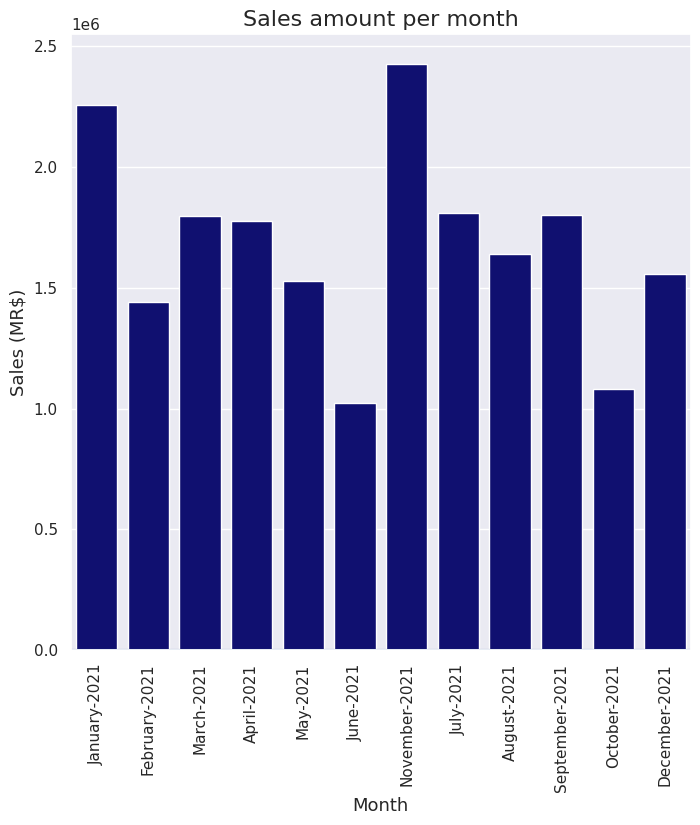

In [138]:
ax = sns.barplot(x='Month', y='Sales_amount', width=0.8, data=data, estimator='sum', color='navy', errorbar=None)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(8,4)})
ax.axhline(data.groupby('Month')['Sales_amount'].mean().mean())
ax.set_title('Sales amount per month', fontsize=16)
ax.set_xlabel('Month', fontsize=13)
ax.set_ylabel('Sales (MR$)', fontsize=13)
plt.show()
ax=ax

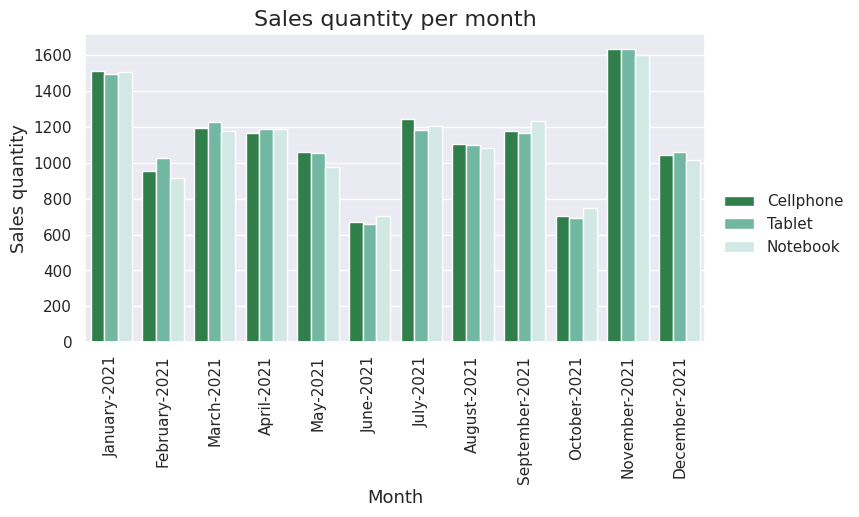

In [139]:
order = ['January-2021', 'February-2021', 'March-2021', 'April-2021',
       'May-2021', 'June-2021', 'July-2021',
       'August-2021', 'September-2021', 'October-2021', 'November-2021', 'December-2021']

ax = sns.barplot(x='Month', y='Qty_sold', hue='Product', order=order, width=0.8, data=data, estimator='sum', palette='BuGn_r', errorbar=None)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(8,4)})
ax.set_title('Sales quantity per month', fontsize=16)
ax.set_xlabel('Month', fontsize=13)
ax.set_ylabel('Sales quantity', fontsize=13)
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='upper left', borderaxespad=0)
plt.show()
ax=ax

Based on the graphs per month, the sales on January and November stands out compared to other months as the biggest sales. In November, we have the Black Friday and on January, we would have to further investigate as there are no dates that particularly affects the sales, or it could be the company's debut.
On the other hand, October and June were the smallest sales.

#### Growth rate (%)

In [140]:
df_order = pd.DataFrame(order)

In [141]:
monthly_sales = pd.DataFrame(data.groupby('Month')['Sales_amount'].sum().reindex(order))
monthly_sales

,Sales_amount
Month,
January-2021,2257400
February-2021,1441300
March-2021,1797400
April-2021,1777300
May-2021,1529200
June-2021,1022900
July-2021,1809100
August-2021,1638900
September-2021,1802000


In [142]:
monthly_sales['Growth_acceleration'] = monthly_sales['Sales_amount'].diff().fillna(0)
monthly_sales['Growth_rate'] = round((monthly_sales['Sales_amount'] / (monthly_sales['Sales_amount'] - monthly_sales['Growth_acceleration'])-1)  * 100, 2).fillna(0)
monthly_sales

,Sales_amount,Growth_acceleration,Growth_rate
Month,,,
January-2021,2257400,0.0,0.00
February-2021,1441300,-816100.0,-36.15
March-2021,1797400,356100.0,24.71
April-2021,1777300,-20100.0,-1.12
May-2021,1529200,-248100.0,-13.96
June-2021,1022900,-506300.0,-33.11
July-2021,1809100,786200.0,76.86
August-2021,1638900,-170200.0,-9.41
September-2021,1802000,163100.0,9.95


In [143]:
print(monthly_sales.query('Growth_rate > 0'))
print(monthly_sales.query('Growth_rate < 0'))

                Sales_amount  Growth_acceleration  Growth_rate
Month                                                         
March-2021           1797400             356100.0        24.71
July-2021            1809100             786200.0        76.86
September-2021       1802000             163100.0         9.95
November-2021        2427000            1346100.0       124.54
               Sales_amount  Growth_acceleration  Growth_rate
Month                                                        
February-2021       1441300            -816100.0       -36.15
April-2021          1777300             -20100.0        -1.12
May-2021            1529200            -248100.0       -13.96
June-2021           1022900            -506300.0       -33.11
August-2021         1638900            -170200.0        -9.41
October-2021        1080900            -721100.0       -40.02
December-2021       1554500            -872500.0       -35.95


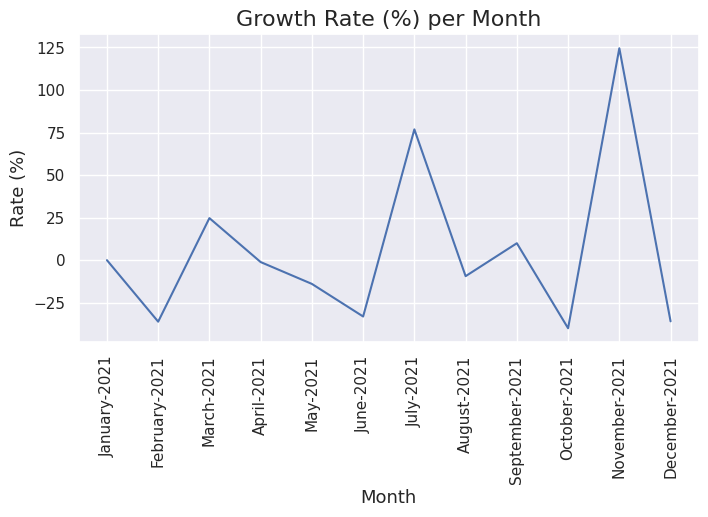

In [144]:
ax = sns.lineplot(x='Month', y='Growth_rate', sort=True, data=monthly_sales)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(8,4)})
ax.set_title('Growth Rate (%) per Month', fontsize=16)
ax.set_xlabel('Month', fontsize=13)
ax.set_ylabel('Rate (%)', fontsize=13)
plt.show()
ax=ax

Analyzing the Sales growth rate comparing one month to the previous we can see another insight. The months between March and June we can see a decrease on the sales. These months could be attacked with a promotion campaign. 

In [145]:
data['Weekday'] = pd.to_datetime(data['Date']).dt.strftime('%a')

In [146]:
data.groupby(['Month', 'Weekday'])['Sales_amount'].sum().mean()

239736.90476190476

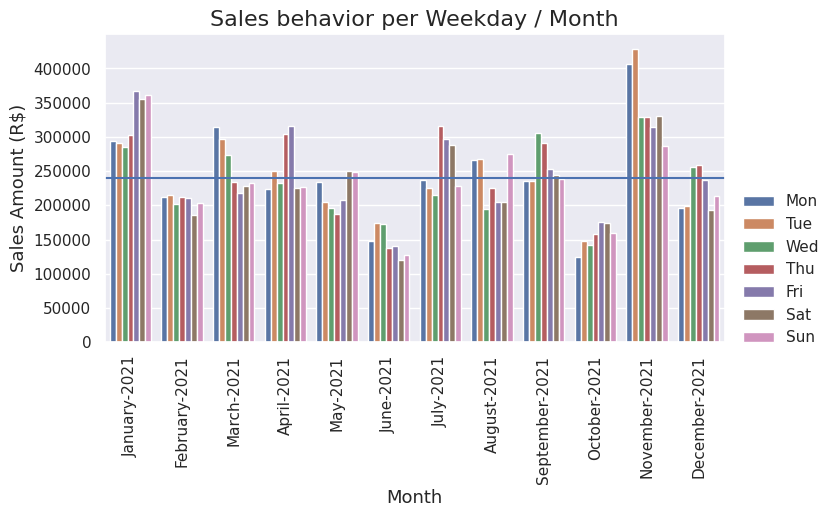

In [147]:
order_months = ['January-2021', 'February-2021', 'March-2021', 'April-2021',
       'May-2021', 'June-2021', 'July-2021',
       'August-2021', 'September-2021', 'October-2021', 'November-2021', 'December-2021']

order_weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sns.barplot(x='Month', y='Sales_amount', hue='Weekday', order=order_months, hue_order=order_weekdays, estimator='sum', data=data, errorbar=None)
ax.axhline(data.groupby(['Month', 'Weekday'])['Sales_amount'].sum().mean())
sns.set(rc={'figure.figsize':(8,8)})
ax.set_title('Sales behavior per Weekday / Month', fontsize=16)
ax.set_xlabel('Month', fontsize=13)
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='upper left', borderaxespad=0)
ax.set_ylabel('Sales Amount (R$)', fontsize=13)
plt.xticks(rotation=90)
ax=ax

### Analyzing profit and sales quantity per product

#### Profit margin analysis

Adding a column with profit margin

In [148]:
data['Profit_margin'] = round(data['Profit'] / data['Sales_amount'], 4)
data.head()

,Date,Seller,State,Product,Unit_Value,Qty_sold,Sales_amount,Profit,Payment_term,State_name,Month,Weekday,Profit_margin
0,2021-01-01,Marco Maia,AM,Cellphone,300,5,1500,500,Credit card,"Amazonas, AM",January-2021,Fri,0.3333
1,2021-01-01,Marco Maia,SC,Tablet,500,2,1000,500,Payment slip,"Santa Catarina, SC",January-2021,Fri,0.5000
2,2021-01-01,Marco Maia,PE,Notebook,700,6,4200,2600,Credit card,"Pernambuco, PE",January-2021,Fri,0.6190
3,2021-01-01,Paula Amorim,MT,Cellphone,300,1,300,100,Payment slip,"Mato Grosso, MT",January-2021,Fri,0.3333
4,2021-01-01,Paula Amorim,TO,Tablet,500,1,500,300,Payment slip,"Tocantins, TO",January-2021,Fri,0.6000


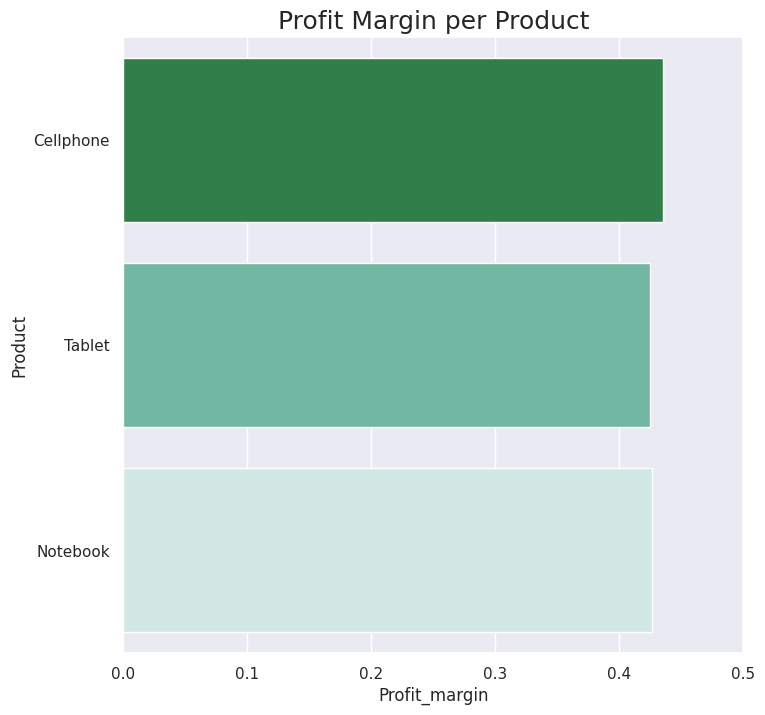

<Figure size 2000x800 with 0 Axes>

In [149]:
ax = sns.barplot(x='Profit_margin', y='Product', data=data, orient='h', errorbar=None, palette='BuGn_r')
plt.figure(figsize=(20,8))
ax.set_title('Profit Margin per Product', fontsize=18)
ax.set(xlim=(0, 0.5))
ax = ax

In [150]:
data.groupby('Product').mean()[['Unit_Value', 'Profit_margin']]

<ipython-input-150-1b59e769c7aa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Product').mean()[['Unit_Value', 'Profit_margin']]


,Unit_Value,Profit_margin
Product,,
Cellphone,300.0,0.435260
Notebook,700.0,0.426583
Tablet,500.0,0.424868


#### Sales quantity analysis

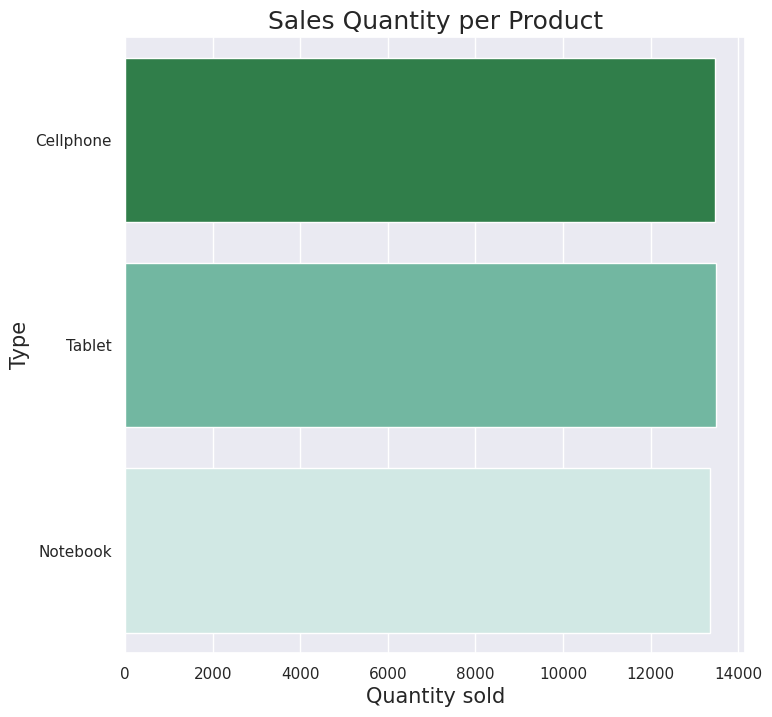

<Figure size 2000x800 with 0 Axes>

In [151]:
ax = sns.barplot(x='Qty_sold', y='Product', data=data, orient='h', estimator='sum', errorbar=None, palette='BuGn_r')
plt.figure(figsize=(20,8))
ax.set_title('Sales Quantity per Product', fontsize=18)
ax.set_xlabel('Quantity sold', fontsize=15)
ax.set_ylabel('Type', fontsize=15)
ax=ax

In [152]:
data.groupby('Product').sum()[['Qty_sold', 'Profit', 'Sales_amount']]

<ipython-input-152-015a4066e928>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Product').sum()[['Qty_sold', 'Profit', 'Sales_amount']]


,Qty_sold,Profit,Sales_amount
Product,,,
Cellphone,13466,1746300,4039800
Notebook,13363,3993400,9354100
Tablet,13488,2856400,6744000


#### Sales profit analysis

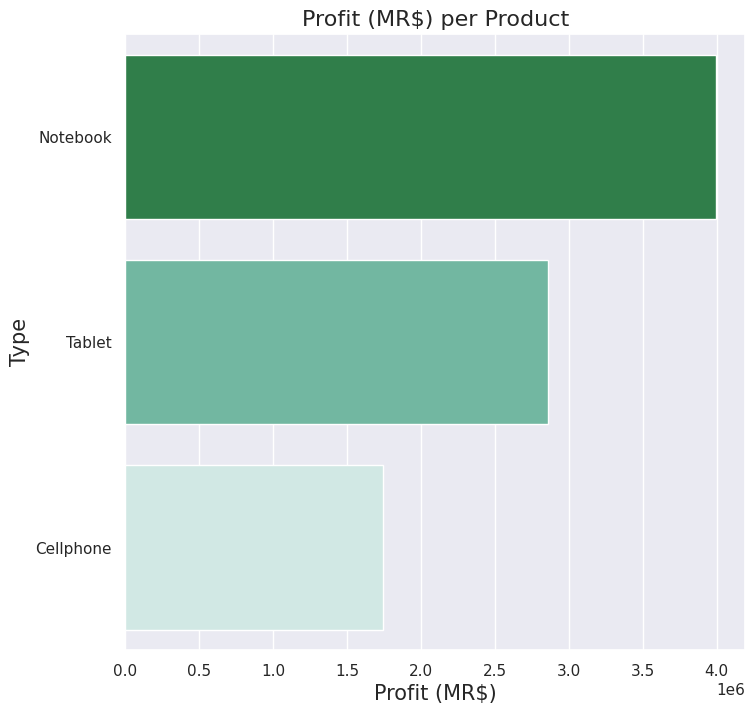

<Figure size 4000x800 with 0 Axes>

In [153]:
result = data.groupby(["Product"])['Profit'].aggregate(sum).reset_index().sort_values('Profit', ascending=False).reset_index()

ax = sns.barplot(x='Profit', y='Product', data=data, orient='h', order=result['Product'], estimator='sum', errorbar=None, palette='BuGn_r')
plt.figure(figsize=(40,8))
ax.set_title('Profit (MR$) per Product', fontsize=16)
ax.set_xlabel('Profit (MR$)', fontsize=15)
ax.set_ylabel('Type', fontsize=15)
ax=ax

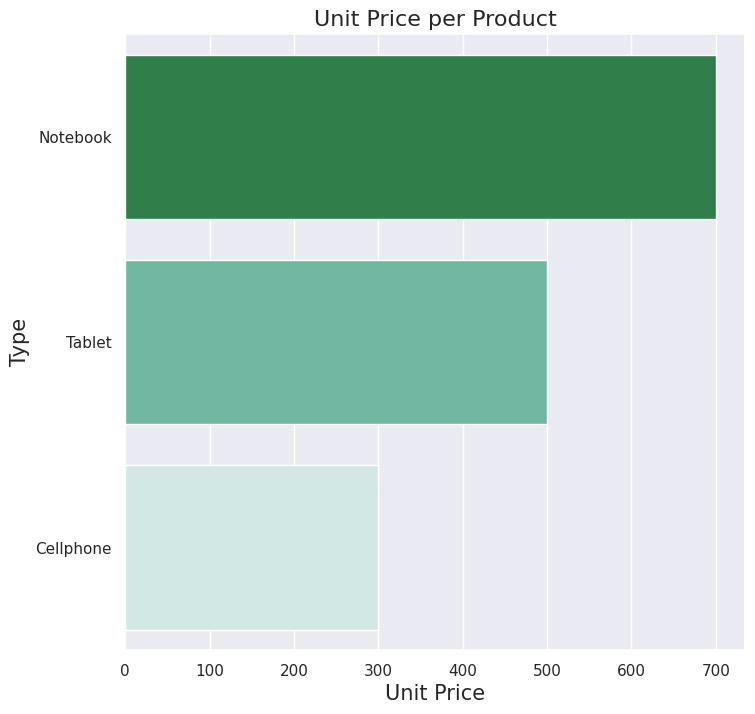

<Figure size 4000x800 with 0 Axes>

In [154]:
result = data.groupby(["Product"])['Unit_Value'].aggregate('mean').reset_index().sort_values('Unit_Value', ascending=False).reset_index()

ax = sns.barplot(x='Unit_Value', y='Product', data=data, order=result['Product'], orient='h', estimator='mean', palette='BuGn_r')
plt.figure(figsize=(40,8))
ax.set_title('Unit Price per Product', fontsize=16)
ax.set_xlabel('Unit Price', fontsize=15)
ax.set_ylabel('Type', fontsize=15)
ax=ax

Based on the analysis made by product, the profit margin, sales quantity for each product is basically the same. 
On the other hand, by analyzing on monetary basis due to natural difference of unit price, and as consequence the profit is higher for notebooks followed by the tablet and cellphones.

###Analyzing Sales per State

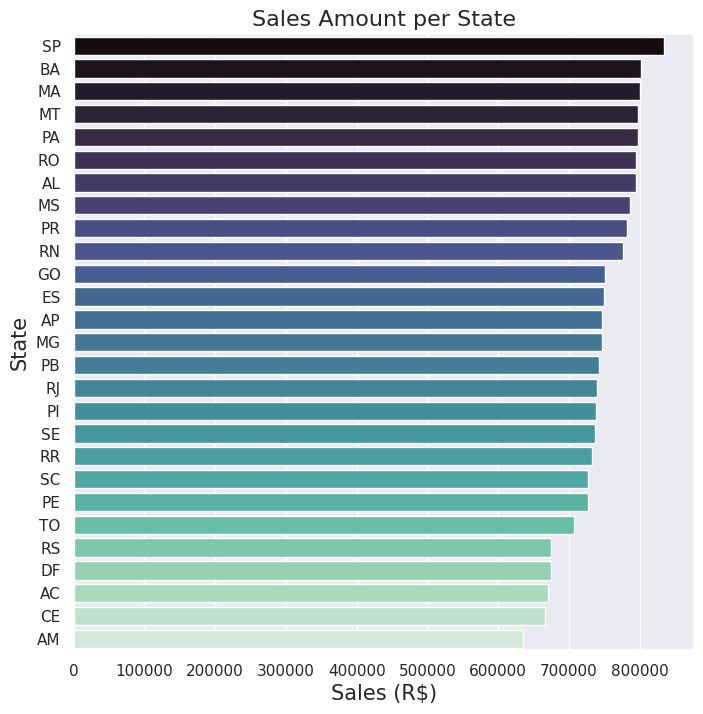

In [155]:
result = data.groupby(["State"])['Sales_amount'].aggregate(sum).reset_index().sort_values('Sales_amount', ascending=False).reset_index()
ax = sns.barplot(x='Sales_amount', y='State', data=data, order=result['State'], orient='h', estimator='sum', errorbar=None, palette='mako')
sns.set(rc={'figure.figsize':(8,8)})
ax.set_title('Sales Amount per State', fontsize=16)
ax.set_xlabel('Sales (R$)', fontsize=15)
ax.set_ylabel('State', fontsize=15)
ax=ax

####Sales amount per state and product

In [156]:
pd.set_option('display.max_rows', data.shape[0]+1)
data.groupby(['State', 'Product'])[['Sales_amount', 'Qty_sold']].sum().sort_values('Sales_amount', ascending=False).head()

,,Sales_amount,Qty_sold
State,Product,,
SP,Notebook,407400,582
MS,Notebook,394800,564
RN,Notebook,392700,561
PR,Notebook,392000,560
AP,Notebook,382200,546


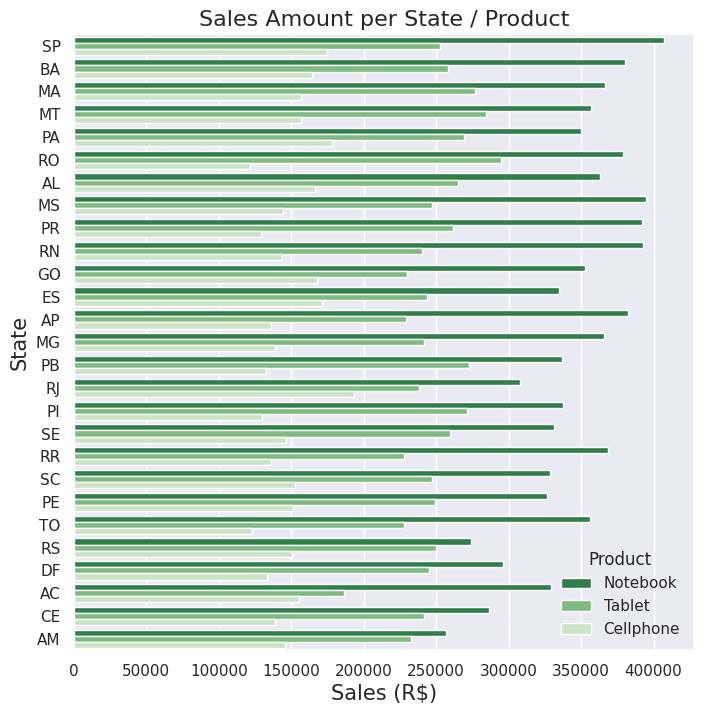

In [157]:
result = data.groupby(["State"])['Sales_amount'].aggregate(sum).reset_index().sort_values('Sales_amount', ascending=False).reset_index()
result2 = data.groupby(["Product"])['Unit_Value'].aggregate('mean').reset_index().sort_values('Unit_Value', ascending=False).reset_index()
ax = sns.barplot(x='Sales_amount', y='State', hue='Product', data=data, order=result['State'], hue_order=result2['Product'], orient='h', palette='Greens_r', estimator='sum', errorbar=None)
sns.set(rc={'figure.figsize':(8,8)})
ax.set_title('Sales Amount per State / Product', fontsize=16)
ax.set_xlabel('Sales (R$)', fontsize=15)
ax.set_ylabel('State', fontsize=15)
ax=ax

In [158]:
data.groupby(["State", "Product"])[['Sales_amount', 'Qty_sold']].sum().sort_values('Qty_sold', ascending=False).head()

Sales_amount  Qty_sold
State Product                          
RJ    Cellphone        193200       644
PA    Cellphone        178500       595
RO    Tablet           295000       590
SP    Cellphone        174900       583
      Notebook         407400       582

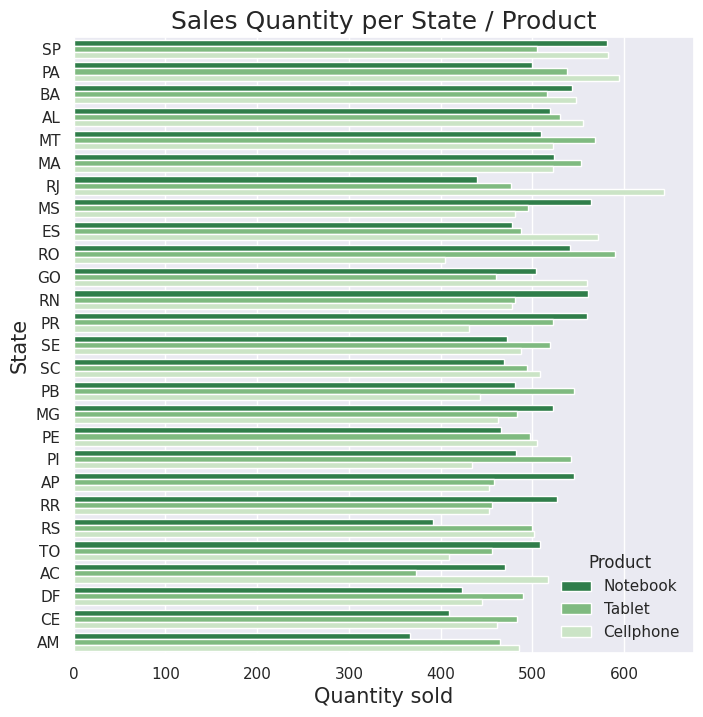

In [159]:
result = data.groupby(["State"])['Qty_sold'].aggregate(sum).reset_index().sort_values('Qty_sold', ascending=False).reset_index()
result2 = data.groupby(["Product"])['Unit_Value'].aggregate('mean').reset_index().sort_values('Unit_Value', ascending=False).reset_index()
ax = sns.barplot(x='Qty_sold', y='State', hue='Product', data=data, order=result['State'], hue_order=result2['Product'], orient='h', palette='Greens_r', estimator='sum', errorbar=None)
sns.set(rc={'figure.figsize':(8,8)})
ax.set_title('Sales Quantity per State / Product', fontsize=18)
ax.set_xlabel('Quantity sold', fontsize=15)
ax.set_ylabel('State', fontsize=15)
ax=ax

São Paulo state is the leader in Sales amount (R$) mainly due to sales of Notebooks and is followed by Mato Grosso do Sul and Rio Grande do Norte. And one note is that Rio de Janeiro stands out by sales quantity of cellphones, followed by Pará.

In [160]:
data.head()

,Date,Seller,State,Product,Unit_Value,Qty_sold,Sales_amount,Profit,Payment_term,State_name,Month,Weekday,Profit_margin
0,2021-01-01,Marco Maia,AM,Cellphone,300,5,1500,500,Credit card,"Amazonas, AM",January-2021,Fri,0.3333
1,2021-01-01,Marco Maia,SC,Tablet,500,2,1000,500,Payment slip,"Santa Catarina, SC",January-2021,Fri,0.5000
2,2021-01-01,Marco Maia,PE,Notebook,700,6,4200,2600,Credit card,"Pernambuco, PE",January-2021,Fri,0.6190
3,2021-01-01,Paula Amorim,MT,Cellphone,300,1,300,100,Payment slip,"Mato Grosso, MT",January-2021,Fri,0.3333
4,2021-01-01,Paula Amorim,TO,Tablet,500,1,500,300,Payment slip,"Tocantins, TO",January-2021,Fri,0.6000


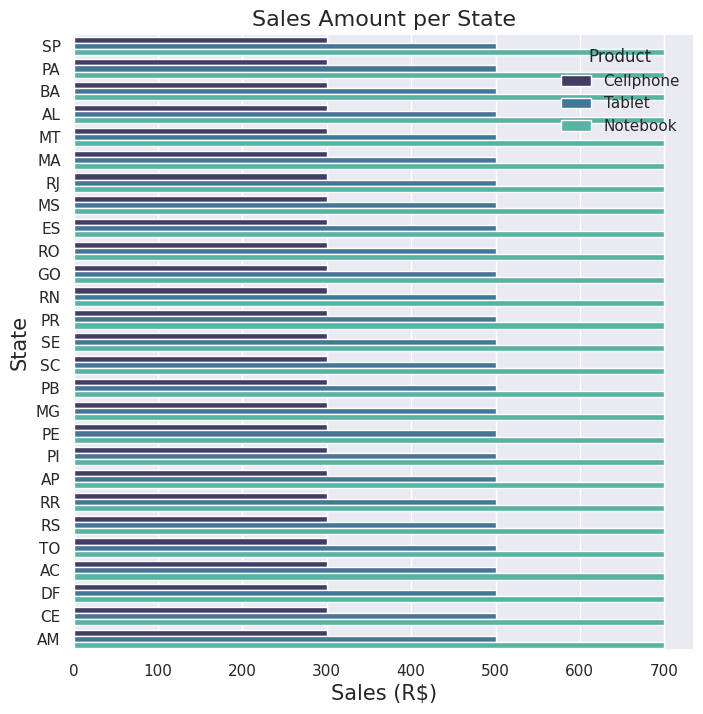

In [161]:
ax = sns.barplot(x='Unit_Value', y='State', hue='Product', data=data, order=result['State'], orient='h', estimator='average', errorbar=None, palette='mako')
sns.set(rc={'figure.figsize':(8,8)})
ax.set_title('Sales Amount per State', fontsize=16)
ax.set_xlabel('Sales (R$)', fontsize=15)
ax.set_ylabel('State', fontsize=15)
ax=ax

####ABC Sales analysis by State

In [162]:
state = data.groupby(["State"])[['Sales_amount', 'Qty_sold']].aggregate(sum).sort_values('Sales_amount', ascending=False).reset_index()
state.head()

,State,Sales_amount,Qty_sold
0,SP,834800,1670
1,BA,802500,1607
2,MA,800200,1600
3,MT,798400,1602
4,PA,797500,1633


/usr/local/lib/python3.10/dist-packages/abc_analysis/abc_analysis.py:163: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y = pd.Series([0]).append(y)
/usr/local/lib/python3.10/dist-packages/abc_analysis/abc_analysis.py:164: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = pd.Series([0]).append(x)


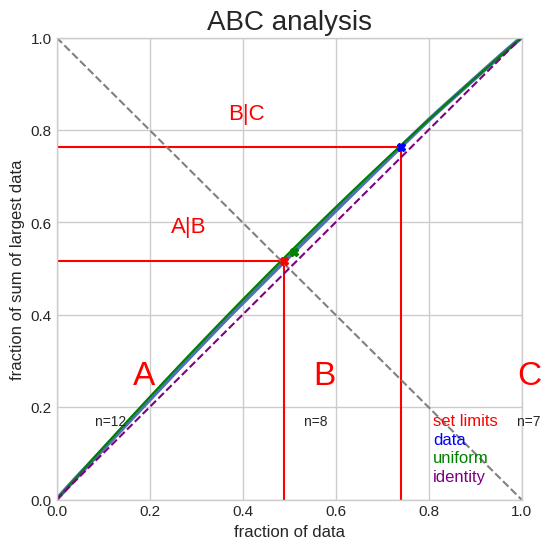

In [163]:
abc = abc_analysis(state['Sales_amount'], True)
ax=ax

In [164]:
a_index = abc['Aind']
b_index = abc['Bind']
c_index = abc['Cind']

cond_list = [state.index.isin(a_index),
             state.index.isin(b_index),
             state.index.isin(c_index)]

choice_list = ['A','B','C']

state['abc'] = np.select(cond_list, choice_list)
state.sort_values(by=['Sales_amount'], ascending=False)

,State,Sales_amount,Qty_sold,abc
0,SP,834800,1670,A
1,BA,802500,1607,A
2,MA,800200,1600,A
3,MT,798400,1602,A
4,PA,797500,1633,A
5,RO,795200,1536,A
6,AL,794800,1604,A
7,MS,786600,1540,A
8,PR,782800,1514,A
9,RN,776600,1520,A


As we could see in previous graphs, and ABC analysis, the states represent a well balanced distribution where the A block is represented 12 out of 27 states. In other words, it's 44,4% of all states that the company is operating.

####ABC Sales analysis by Region

In [165]:
states = seller_state['State'].unique()
states

array(['BA', 'RR', 'SP', 'TO', 'MS', 'RO', 'PE', 'AP', 'PR', 'PI', 'GO',
       'PA', 'RN', 'PB', 'MA', 'RJ', 'MT', 'MG', 'AC', 'SC', 'ES', 'SE',
       'AL', 'DF', 'RS', 'AM', 'CE'], dtype=object)

In [166]:
def region_class (state):
  if state in ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO']:
     return 'North'
  elif state in ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']:
    return 'Northeast'
  elif state in ['DF', 'GO', 'MT', 'MS']:
    return 'Midwest'
  elif state in ['ES', 'MG', 'RJ', 'SP']:
    return 'Southeast'
  elif state in ['PR', 'RS', 'SC']:
    return 'South'
  else:
    return 'Check'

state['Region'] = state['State'].apply(region_class)
state.head()

,State,Sales_amount,Qty_sold,abc,Region
0,SP,834800,1670,A,Southeast
1,BA,802500,1607,A,Northeast
2,MA,800200,1600,A,Northeast
3,MT,798400,1602,A,Midwest
4,PA,797500,1633,A,North


In [167]:
region_sum = state.groupby('Region').sum().sort_values('Sales_amount', ascending=False).reset_index()
region_sum

<ipython-input-167-870289913d82>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_sum = state.groupby('Region').sum().sort_values('Sales_amount', ascending=False).reset_index()


,Region,Sales_amount,Qty_sold
0,Northeast,6785400,13562
1,North,5085400,10114
2,Southeast,3071200,6238
3,Midwest,3010400,6024
4,South,2185500,4379


/usr/local/lib/python3.10/dist-packages/abc_analysis/abc_analysis.py:163: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y = pd.Series([0]).append(y)
/usr/local/lib/python3.10/dist-packages/abc_analysis/abc_analysis.py:164: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = pd.Series([0]).append(x)


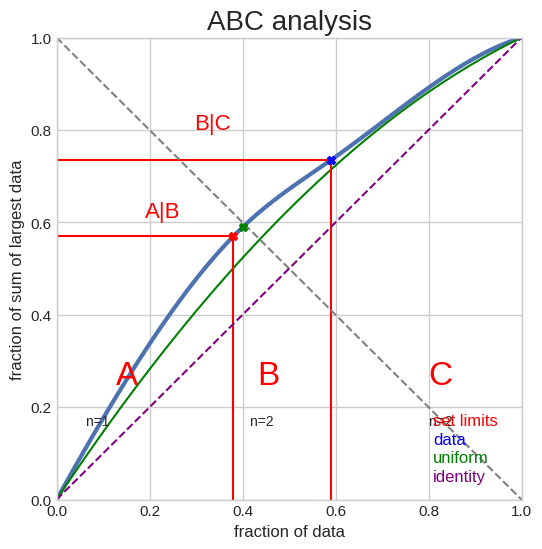

In [168]:
abc = abc_analysis(region_sum['Sales_amount'], True)
ax=ax

In [169]:
a_index = abc['Aind']
b_index = abc['Bind']
c_index = abc['Cind']

cond_list = [region_sum.index.isin(a_index),
             region_sum.index.isin(b_index),
             region_sum.index.isin(c_index)]

choice_list = ['A','B','C']

region_sum['abc_region'] = np.select(cond_list, choice_list)
region_sum['percent_total'] = region_sum['Sales_amount'] / region_sum['Sales_amount'].sum()
region_sum

,Region,Sales_amount,Qty_sold,abc_region,percent_total
0,Northeast,6785400,13562,A,0.336947
1,North,5085400,10114,B,0.252529
2,Southeast,3071200,6238,B,0.152508
3,Midwest,3010400,6024,C,0.149489
4,South,2185500,4379,C,0.108527


By doing ABC analysis by region, it is clear that Northeast region leads the sales amount being classified as the only A in the analysis. It reperesents almost 34% out total of sales in the entire country due to quantity of states in this region.

In [170]:
region_product = data.groupby(['State', 'Product'])[['Sales_amount', 'Qty_sold']].aggregate(sum).sort_values('Sales_amount', ascending=False).reset_index()
region_product['Region'] = region_product['State'].apply(region_class)
region_product.head()

,State,Product,Sales_amount,Qty_sold,Region
0,SP,Notebook,407400,582,Southeast
1,MS,Notebook,394800,564,Midwest
2,RN,Notebook,392700,561,Northeast
3,PR,Notebook,392000,560,South
4,AP,Notebook,382200,546,North


<ipython-input-171-9407e7941cc2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_order = region_product.groupby('Region').sum().sort_values('Sales_amount', ascending=False).index


Text(0, 0.5, 'Quantity sold (units)')

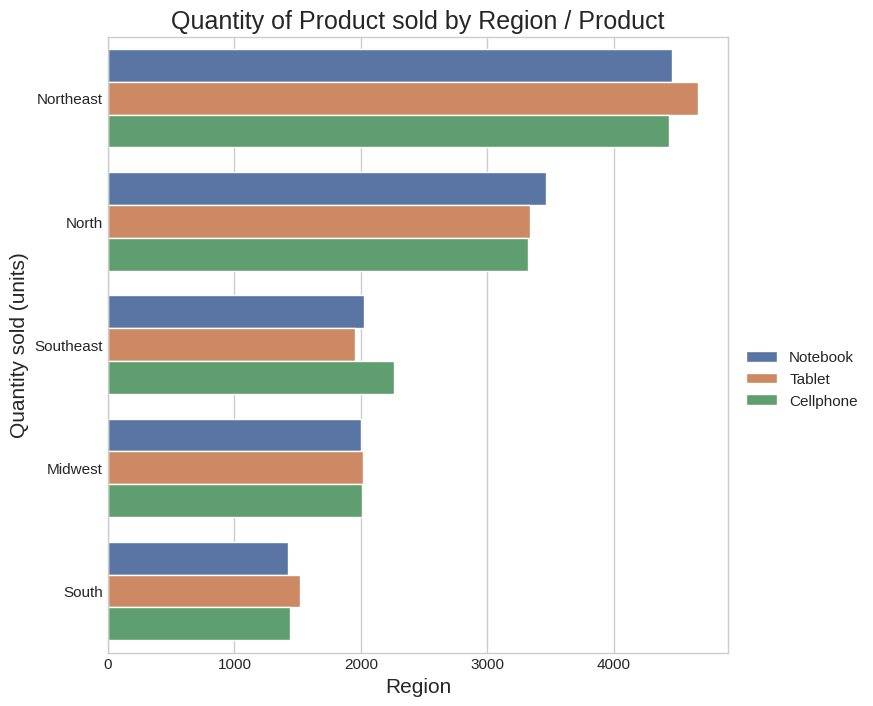

In [171]:
region_order = region_product.groupby('Region').sum().sort_values('Sales_amount', ascending=False).index

ax = sns.barplot(x='Qty_sold', y='Region', hue='Product', data=region_product, orient='h', estimator='sum', order=region_order, errorbar=None)
ax.set_title('Quantity of Product sold by Region / Product', fontsize=18)
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='upper left', borderaxespad=0)
ax.set_xlabel('Region', fontsize=15)
ax.set_ylabel('Quantity sold (units)', fontsize=15)

The sales of Cellphones excells in Southeast regions mainly due to Rio de Janeiro state. The sales in Northeast region sells more tablets than cellphones and notebooks.

### Analyzing Sellers Performance

In [172]:
seller_general = pd.DataFrame(data.groupby('Seller').sum()[['Qty_sold', 'Sales_amount', 'Profit']].sort_values('Profit', ascending=False).reset_index())
seller_general.head()

<ipython-input-172-61768e7ae45b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seller_general = pd.DataFrame(data.groupby('Seller').sum()[['Qty_sold', 'Sales_amount', 'Profit']].sort_values('Profit', ascending=False).reset_index())


,Seller,Qty_sold,Sales_amount,Profit
0,Vanessa Souza,11901,5938500,2521500
1,Paula Amorim,10635,5311900,2276200
2,Marco Maia,10394,5183800,2203100
3,Bruna Castro,7387,3703700,1595300


Text(0, 0.5, 'Seller')

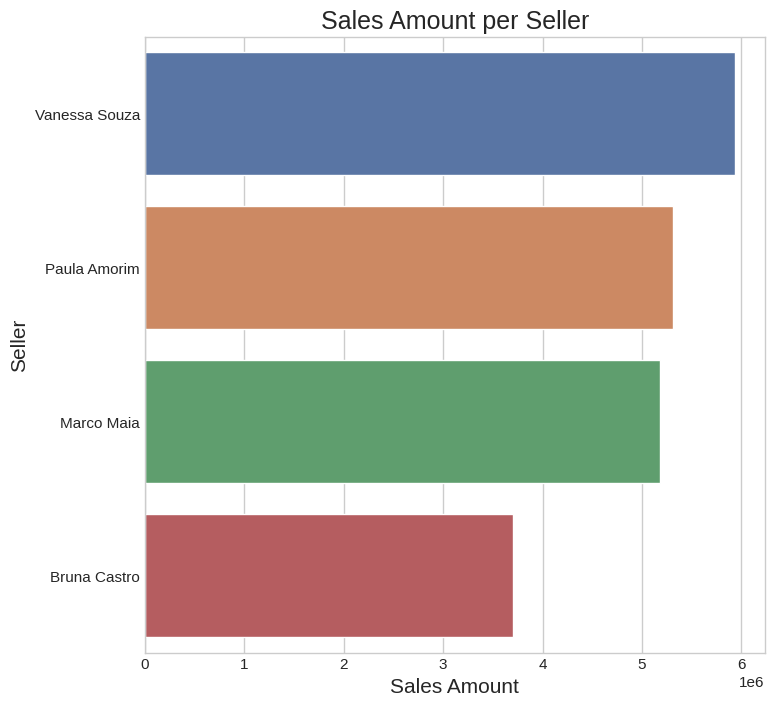

In [173]:
ax = sns.barplot(x='Sales_amount', y='Seller', data=seller_general, orient='h', estimator='sum')
ax.set_title('Sales Amount per Seller', fontsize=18)
ax.set_xlabel('Sales Amount', fontsize=15)
ax.set_ylabel('Seller', fontsize=15)

Text(0, 0.5, 'Seller')

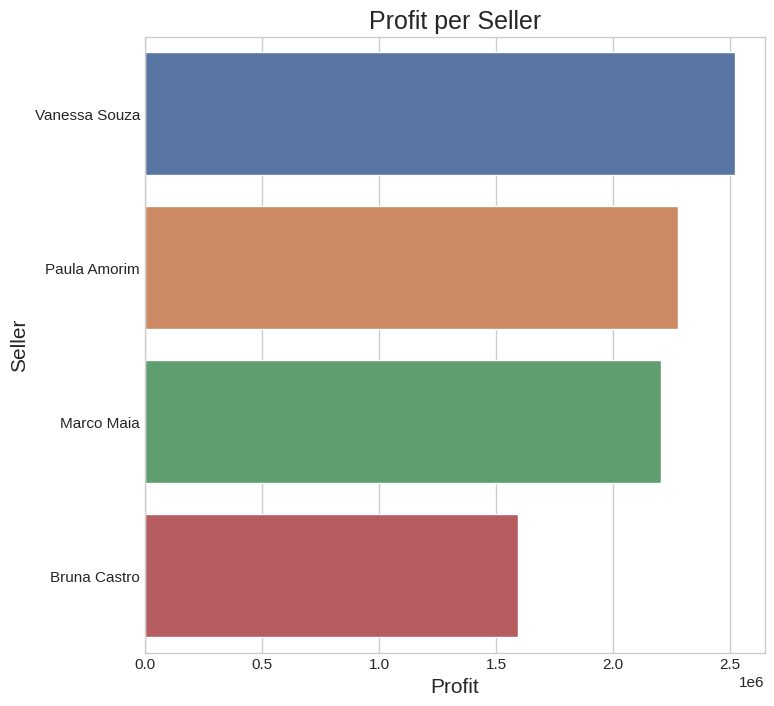

In [174]:
ax = sns.barplot(x='Profit', y='Seller', data=seller_general, orient='h', estimator='sum')
ax.set_title('Profit per Seller', fontsize=18)
ax.set_xlabel('Profit', fontsize=15)
ax.set_ylabel('Seller', fontsize=15)

Vanessa Souza is the company's top seller of the company followed by Paula Amorin. 

#### Sales by product

In [175]:
seller_product = pd.DataFrame(data.groupby(['Seller', 'Product']).sum()[['Qty_sold', 'Sales_amount', 'Profit']].sort_values(['Product', 'Profit'], ascending=False).reset_index())
seller_product

<ipython-input-175-3e7b5a424282>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seller_product = pd.DataFrame(data.groupby(['Seller', 'Product']).sum()[['Qty_sold', 'Sales_amount', 'Profit']].sort_values(['Product', 'Profit'], ascending=False).reset_index())


,Seller,Product,Qty_sold,Sales_amount,Profit
0,Vanessa Souza,Tablet,4007,2003500,848600
1,Paula Amorim,Tablet,3569,1784500,748700
2,Marco Maia,Tablet,3444,1722000,725500
3,Bruna Castro,Tablet,2468,1234000,533600
4,Vanessa Souza,Notebook,3917,2741900,1156400
5,Paula Amorim,Notebook,3519,2463300,1064400
6,Marco Maia,Notebook,3442,2409400,1030300
7,Bruna Castro,Notebook,2485,1739500,742300
8,Vanessa Souza,Cellphone,3977,1193100,516500
9,Paula Amorim,Cellphone,3547,1064100,463100


<Axes: xlabel='Qty_sold', ylabel='Seller'>

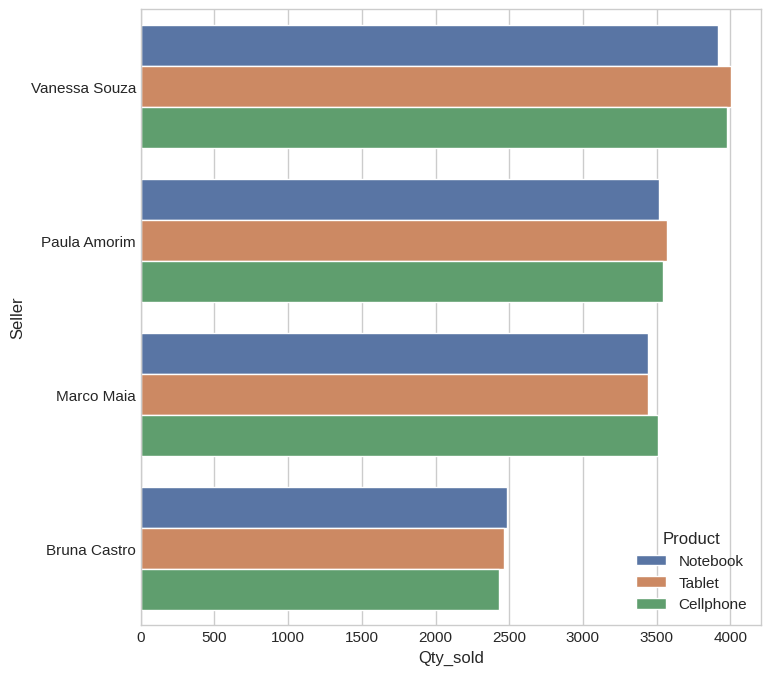

In [176]:
hue_order = ['Notebook', 'Tablet', 'Cellphone']
sns.barplot(x='Qty_sold', y='Seller', hue='Product', data=seller_product, hue_order=hue_order, orient='h', estimator='sum')

The proportion of products sold per seller seems to be almost the same for each one.

#### Sales by state

In [177]:
seller_state = pd.DataFrame(data.groupby(['Seller', 'Product', 'State']).sum()[['Qty_sold', 'Sales_amount', 'Profit']].sort_values('Profit', ascending=False).reset_index())
seller_state.head()

<ipython-input-177-47e1e96cbe54>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seller_state = pd.DataFrame(data.groupby(['Seller', 'Product', 'State']).sum()[['Qty_sold', 'Sales_amount', 'Profit']].sort_values('Profit', ascending=False).reset_index())


,Seller,Product,State,Qty_sold,Sales_amount,Profit
0,Vanessa Souza,Notebook,BA,202,141400,68200
1,Paula Amorim,Notebook,RR,200,140000,60900
2,Vanessa Souza,Notebook,SP,191,133700,56900
3,Vanessa Souza,Notebook,TO,202,141400,56400
4,Vanessa Souza,Notebook,MS,181,126700,53800


In [178]:
print(len(seller_state.query('Seller == "Vanessa Souza"').groupby('State').sum()),
len(seller_state.query('Seller == "Paula Amorim"').groupby('State').sum()),
len(seller_state.query('Seller == "Marco Maia"').groupby('State').sum()),
len(seller_state.query('Seller == "Bruna Castro"').groupby('State').sum()))

27 27 27 27


<ipython-input-178-69d383c827a1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(len(seller_state.query('Seller == "Vanessa Souza"').groupby('State').sum()),
<ipython-input-178-69d383c827a1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  len(seller_state.query('Seller == "Paula Amorim"').groupby('State').sum()),
<ipython-input-178-69d383c827a1>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  len(seller_state.qu

All vendors are operating its sales over all states. This could lead to an overlapping of sales. A suggestion would be to distribute each region of the country to each seller in order concentrate his efforts and reduce sales operating expenses.

<Axes: xlabel='Sales_amount', ylabel='State'>

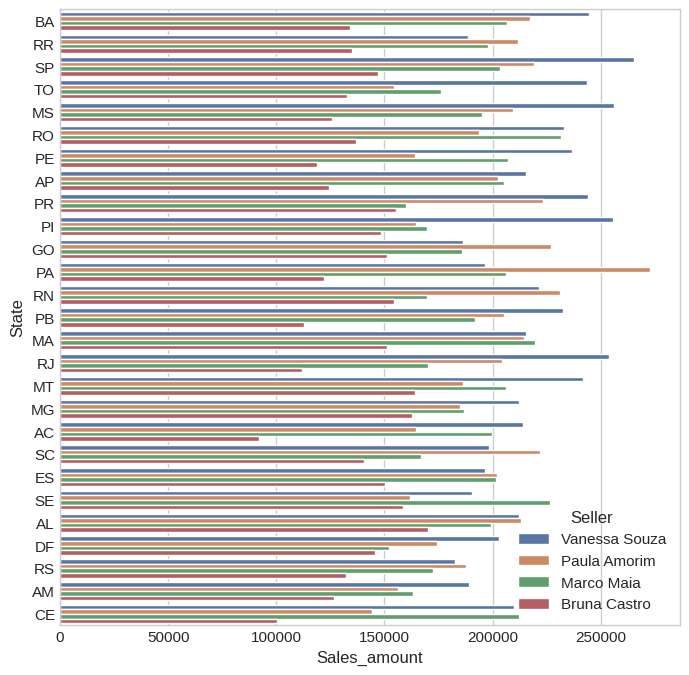

In [179]:
sns.barplot(x='Sales_amount', y='State', hue='Seller', data=seller_state, orient='h', estimator='sum', errorbar=None)

With this graph plot it is hard to analyze each seller per state, so I'm classifying the states per regions.

#### Sales by region

In [180]:
seller_state['Seller'].unique()

array(['Vanessa Souza', 'Paula Amorim', 'Marco Maia', 'Bruna Castro'],
      dtype=object)

In [181]:
seller_state['Region'] = seller_state['State'].apply(region_class)
seller_state.head()

,Seller,Product,State,Qty_sold,Sales_amount,Profit,Region
0,Vanessa Souza,Notebook,BA,202,141400,68200,Northeast
1,Paula Amorim,Notebook,RR,200,140000,60900,North
2,Vanessa Souza,Notebook,SP,191,133700,56900,Southeast
3,Vanessa Souza,Notebook,TO,202,141400,56400,North
4,Vanessa Souza,Notebook,MS,181,126700,53800,Midwest


In [182]:
seller_state['Region'].unique()

array(['Northeast', 'North', 'Southeast', 'Midwest', 'South'],
      dtype=object)

In [183]:
seller_state.query('Seller == "Vanessa Souza"').groupby('Region').sum().sort_values('Sales_amount', ascending=False).head()

<ipython-input-183-ab80ae6ed26b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seller_state.query('Seller == "Vanessa Souza"').groupby('Region').sum().sort_values('Sales_amount', ascending=False).head()


,Qty_sold,Sales_amount,Profit
Region,,,
Northeast,4042,2018600,852800
North,2944,1480400,631900
Southeast,1901,927300,390400
Midwest,1772,887400,380700
South,1242,624800,265700


In [184]:
seller_state.query('Seller == "Paula Amorim"').groupby('Region').sum().sort_values('Sales_amount', ascending=False).head()

<ipython-input-184-928902faca9b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seller_state.query('Seller == "Paula Amorim"').groupby('Region').sum().sort_values('Sales_amount', ascending=False).head()


,Qty_sold,Sales_amount,Profit
Region,,,
Northeast,3435,1715700,733600
North,2698,1356000,581700
Southeast,1627,810300,352500
Midwest,1604,796800,338100
South,1271,633100,270300


In [185]:
seller_state.query('Seller == "Marco Maia"').groupby('Region').sum().sort_values('Sales_amount', ascending=False).head()

<ipython-input-185-9605cab06a03>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seller_state.query('Seller == "Marco Maia"').groupby('Region').sum().sort_values('Sales_amount', ascending=False).head()


,Qty_sold,Sales_amount,Profit
Region,,,
Northeast,3593,1803100,756700
North,2738,1379800,587400
Southeast,1574,761800,328800
Midwest,1474,739600,318600
South,1015,499500,211600


In [186]:
seller_state.query('Seller == "Bruna Castro"').groupby('Region').sum().sort_values('Sales_amount', ascending=False).head()

<ipython-input-186-d0ced48f0324>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seller_state.query('Seller == "Bruna Castro"').groupby('Region').sum().sort_values('Sales_amount', ascending=False).head()


,Qty_sold,Sales_amount,Profit
Region,,,
Northeast,2492,1248000,542700
North,1734,869200,369500
Midwest,1174,586600,252300
Southeast,1136,571800,242600
South,851,428100,188200


<Axes: xlabel='Sales_amount', ylabel='Region'>

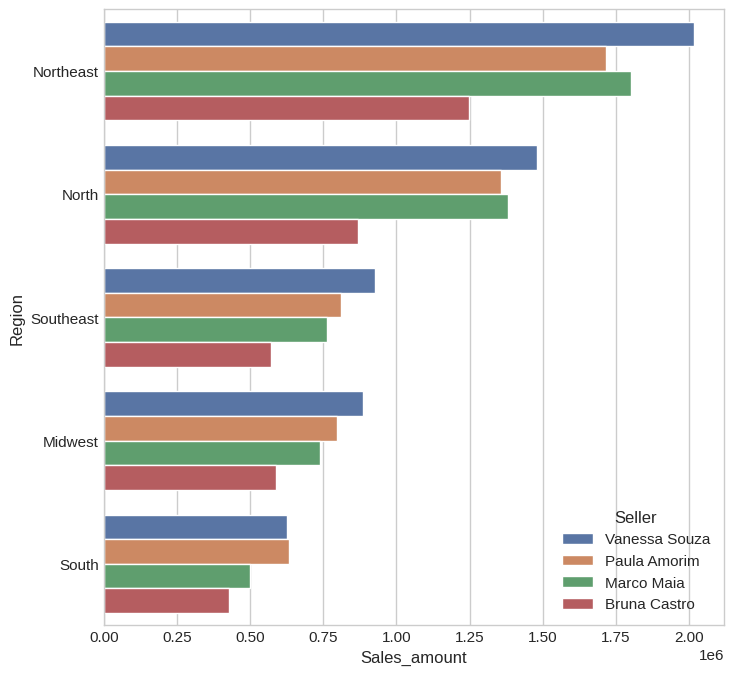

In [187]:
sns.barplot(x='Sales_amount', y='Region', hue='Seller', data=seller_state, orient='h', estimator='sum', errorbar=None)

In [188]:
seller_state.groupby('Region').sum().sort_values('Sales_amount', ascending=False)

<ipython-input-188-f140cb6b1a60>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seller_state.groupby('Region').sum().sort_values('Sales_amount', ascending=False)


,Qty_sold,Sales_amount,Profit
Region,,,
Northeast,13562,6785400,2885800
North,10114,5085400,2170500
Southeast,6238,3071200,1314300
Midwest,6024,3010400,1289700
South,4379,2185500,935800


In [189]:
seller_general

,Seller,Qty_sold,Sales_amount,Profit
0,Vanessa Souza,11901,5938500,2521500
1,Paula Amorim,10635,5311900,2276200
2,Marco Maia,10394,5183800,2203100
3,Bruna Castro,7387,3703700,1595300


As mentioned before, due to overlapping of sales force on same states, a suggestion is to divide each seller to a region even mixing it by proximity. This could lead to a reduction on operating expenses (travel expenses mainly) as well as manpower hours dedicated. 

# Conclusion

Depending on company's goals, we could see the following points:

(1) Sales peaks are in January and November;

(2) Sales bottoms are in June and October;

(3) Growth rate is negative bewteen March and June;

(4) Products presents no big difference of Profit Margin (%) compare to one another;

(5) Notebooks are the most profitable due to its higher price followed by Tablet and Cellphone, sequentially;

(6) Products sales quantity is almost same level compare to ano another;

(7) SP state is the top state in sales amount. In ABC analysis, 12 states out of 27, representing 44% of total sales;

(8) When dividing by region, Northeast region is the top in sales amount. In ABC analysis, Northeast region represents 34% of total sales;

(9) In the sales force, Vanessa is the top seller, followed by Paula, Marco and Bruna, sequentially.

(10) All sellers are operating in all states, which could indicate a low efficiency or an opportunity to focus each seller to a specific, but not limited to a region.

In [190]:
data['Region'] = data['State'].apply(region_class)
data.head()

,Date,Seller,State,Product,Unit_Value,Qty_sold,Sales_amount,Profit,Payment_term,State_name,Month,Weekday,Profit_margin,Region
0,2021-01-01,Marco Maia,AM,Cellphone,300,5,1500,500,Credit card,"Amazonas, AM",January-2021,Fri,0.3333,North
1,2021-01-01,Marco Maia,SC,Tablet,500,2,1000,500,Payment slip,"Santa Catarina, SC",January-2021,Fri,0.5000,South
2,2021-01-01,Marco Maia,PE,Notebook,700,6,4200,2600,Credit card,"Pernambuco, PE",January-2021,Fri,0.6190,Northeast
3,2021-01-01,Paula Amorim,MT,Cellphone,300,1,300,100,Payment slip,"Mato Grosso, MT",January-2021,Fri,0.3333,Midwest
4,2021-01-01,Paula Amorim,TO,Tablet,500,1,500,300,Payment slip,"Tocantins, TO",January-2021,Fri,0.6000,North


In [191]:
data.to_csv('sales_dataset_X_Company.csv')